<a href="https://colab.research.google.com/github/DharanidharKola/Uber-Requests-EDA/blob/main/Uber_requests_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Unlocking Insights from Uber Requests: A Visual Journey***

**Project Type** - EDA

**Contribution** - Individual

**Team Member 1** - Dharanidhar

# **Project Summary**

This project focuses on uncovering patterns and insights from Uber ride requests using Exploratory Data Analysis techniques. The dataset used includes nearly 6,745 Uber ride request records, comprising timestamps, pickup points, request statuses, and driver IDs.

The core objective was to identify service inefficiencies, particularly those causing ride cancellations or unavailability during high-demand periods. The data was first cleaned and preprocessed—converting timestamps, extracting hour and day features, and handling missing values.

Using a structured UBM (Univariate, Bivariate, Multivariate) analysis approach, more than 20 meaningful visualizations were generated:
- Univariate: Showed request volumes by hour and day, identifying peak times.
- Bivariate: Visualized pickup points vs request status, and request hour vs status, revealing key issues during morning and evening rush hours.
- Multivariate: A heatmap and supply-demand curves were created to highlight critical bottlenecks.

Major insights:
- Peak demand occurred between 7–10 AM and 5–7 PM, with a high percentage of unfulfilled requests.
- City pickups had more cancellations, while airport pickups faced more “No Cars Available” statuses.
- There is a noticeable supply-demand gap, especially during peak hours.
- The cancellation rate was higher in the morning, suggesting driver unavailability or mismatch.

These insights point toward the need for:
- Better supply planning by time and location.
- Dynamic driver allocation during peak times.
- Improvements in user experience by reducing cancellations and no-car-available instances.

Overall, this EDA project delivers actionable insights that can help Uber optimize its operations, improve user satisfaction, and increase profitability.


# **GitHub Link**

https://github.com/DharanidharKola

# **Problem Statement**

To analyze Uber ride request data and identify patterns, inefficiencies, and business-critical insights that impact service delivery, particularly during high-demand time slots.

# **Let's Begin !**

## **Know Your Data**

## Import Libraries

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Loading

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Uber_Request_Data.csv to Uber_Request_Data.csv


In [7]:
data = pd.read_csv('Uber_Request_Data.csv')

## Dataset First View

In [8]:
data.head()

,Request_id,Pickup_point,Driver_id,Status,Request_Timestamp,Drop_Timestamp
0,619,Airport,1.0,Trip Completed,2016/07/11 11:51:00,2016/07/11 13:00:00
1,867,Airport,1.0,Trip Completed,2016/07/11 17:57:00,2016/07/11 18:47:00
2,1807,City,1.0,Trip Completed,2016/07/12 09:17:00,2016/07/12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016/07/12 21:08:00,2016/07/12 22:03:00
4,3112,City,1.0,Trip Completed,2016/07/13 08:33:00,2016/07/13 09:25:00


## Dataset Information

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request_id         6745 non-null   int64  
 1   Pickup_point       6745 non-null   object 
 2   Driver_id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request_Timestamp  6745 non-null   object 
 5   Drop_Timestamp     6745 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [10]:
data['Request_Timestamp']=pd.to_datetime(data['Request_Timestamp'])
data['Drop_Timestamp']=data['Drop_Timestamp'].astype(str)
data['Driver_id']=data['Driver_id'].astype(str)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request_id         6745 non-null   int64         
 1   Pickup_point       6745 non-null   object        
 2   Driver_id          6745 non-null   object        
 3   Status             6745 non-null   object        
 4   Request_Timestamp  6745 non-null   datetime64[ns]
 5   Drop_Timestamp     6745 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 316.3+ KB
None


## What did you know about your dataset?

- Total entries: 6745
- Features: Request ID, Pickup Point, Driver ID, Status, Request Timestamp, Drop Timestamp
- Derived Features: Request Hour, Request Day
- Nulls: Mainly in Drop Timestamp and Driver ID for unfulfilled trips
- Types: Timestamps converted to datetime, driver ID treated as categorical


# **Data Wrangling**

In [13]:
data.duplicated().sum()

np.int64(0)

In [14]:
data.isnull().sum()

,0
Request_id,0
Pickup_point,0
Driver_id,0
Status,0
Request_Timestamp,0
Drop_Timestamp,0


In [15]:
data['Request hour'] = data['Request_Timestamp'].dt.hour
data['Request day'] = data['Request_Timestamp'].dt.day

# **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

## **Chart 1:**

/tmp/ipython-input-17-674283316.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x='Request hour', data=data, palette='viridis')


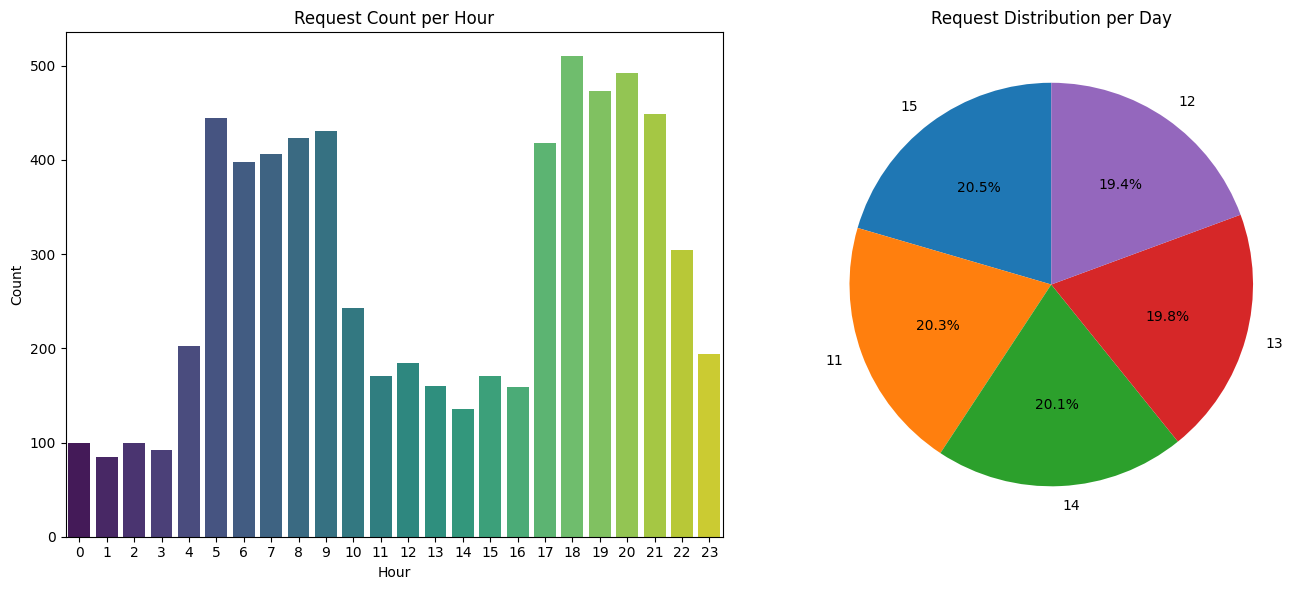

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(ax=axes[0], x='Request hour', data=data, palette='viridis')
axes[0].set_title('Request Count per Hour')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Count')

day_counts = data['Request day'].value_counts()
axes[1].pie(day_counts, labels=day_counts.index, startangle=90, autopct='%1.1f%%')
axes[1].set_title('Request Distribution per Day')

plt.tight_layout()
plt.show()

## **1: Request Count per Hour (Countplot)**

### **Why this chart?**
To identify the hours of the day when most ride requests are made.

### Insights:
There are two prominent peaks — morning (8 AM to 10 AM) and evening (5 PM to 7 PM). These likely correspond to office commute hours.

### Business Impact:
Uber must increase driver availability during these rush hours to meet demand and avoid cancellations or "No Cars Available" cases.

## **2: Request Distribution per Day (Pie Chart)**

### Why this chart?
To check if demand fluctuates across different days of the month.

## Insights:
Requests are fairly evenly distributed across days, indicating that day-of-month isn't a significant factor in demand spikes.

### Business Impact:
Focus should remain on time-of-day optimization rather than calendar-based scheduling.

## **Chart 2:**

/tmp/ipython-input-19-3204565257.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x='Pickup_point', data=data, palette='viridis')


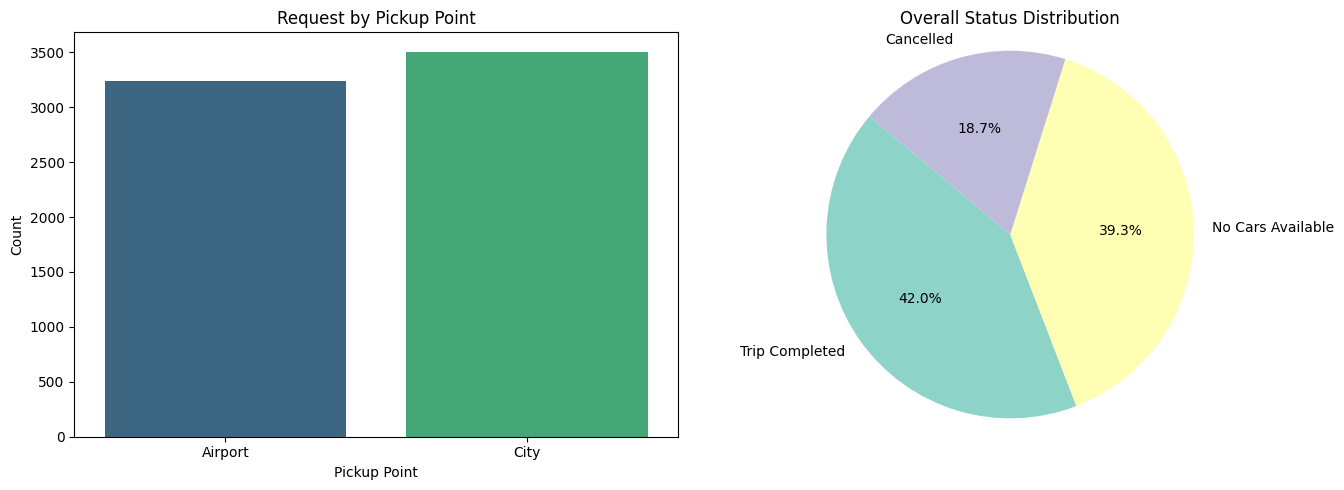

In [19]:
status_counts = data['Status'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(ax=axes[0], x='Pickup_point', data=data, palette='viridis')
axes[0].set_title('Request by Pickup Point')
axes[0].set_xlabel('Pickup Point')
axes[0].set_ylabel('Count')

axes[1].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%',
            startangle=140, colors=sns.color_palette('Set3'))
axes[1].set_title('Overall Status Distribution')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

## **1: Request by Pickup Point (Countplot)**

### Why this chart?
To analyze where most requests originate — from the airport or the city.

## Insights:
City has a higher number of requests than the airport.

## Business Impact:
More drivers should be stationed in the city, but airport-specific demand should still be monitored due to spikes during peak travel times.

## **2: Overall Status Distribution (Pie Chart)**

### Why this chart?
To understand how many rides were completed, cancelled, or not fulfilled.

### Insights:
A significant portion of rides are either cancelled or result in “No Cars Available.”

### Business Impact:
High failure rate in fulfilling requests harms customer experience and requires urgent operational fixes.

## **Chart 3:** Request Status by Hour (Countplot with Hue)

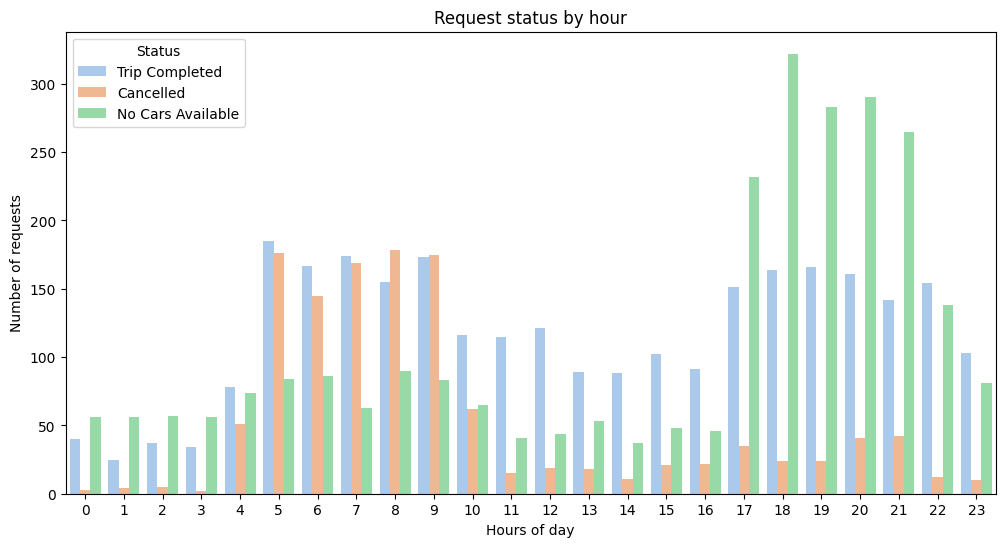

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x='Request hour', hue='Status',data=data,palette='pastel')
plt.title('Request status by hour')
plt.xlabel('Hours of day')
plt.ylabel('Number of requests')
plt.legend(title='Status')
plt.show()

### Why this chart?
To visualize the relationship between request time and ride status.

### Insights:

Morning peak: High cancellations

Evening peak: High “No Cars Available” instances

### Business Impact:
Different issues exist during each peak. Morning cancellations could be due to driver availability or preference, while evening no-availability points to supply-demand mismatch.


## **Chart 4:** Pickup Point vs Request Status (Countplot with Hue)

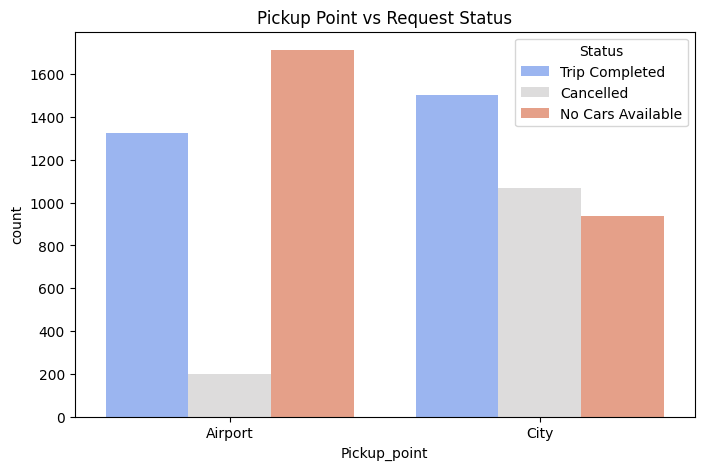

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x='Pickup_point', hue='Status', data=data, palette='coolwarm')
plt.title('Pickup Point vs Request Status')
plt.show()

### Why this chart?
To explore how ride status varies by pickup location.

### Insights:

City: More cancellations

Airport: More “No Cars Available”

### Business Impact:
Deployment strategy must be location-aware. City needs driver reliability improvements, while the airport needs better supply forecasting.

## **Chart 5:** Heatmap of Status by Hour

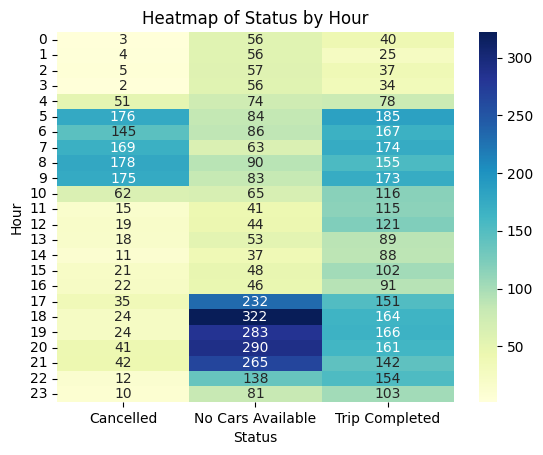

In [22]:
heat_data = pd.crosstab(data['Request hour'], data['Status'])
sns.heatmap(heat_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Status by Hour')
plt.xlabel('Status')
plt.ylabel('Hour')
plt.show()

### Why this chart?
To show a detailed view of status distribution across hours in a compact form.

### Insights:
Cancellations are high around 7–10 AM, and “No Cars Available” surges in the evening.

### Business Impact:
Heatmaps provide an easy dashboard for Uber to monitor and act on operational bottlenecks in real time.

## **Chart 6:** Supply vs Demand by Hour (Line Plot)

<Figure size 640x480 with 0 Axes>

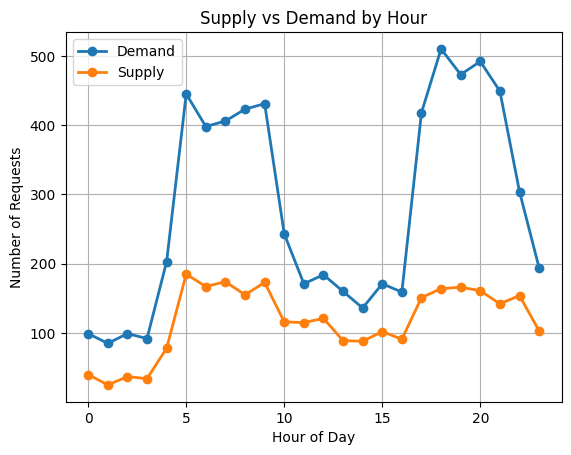

In [23]:
demand = data.groupby('Request hour').size()

supply = data[data['Status'] == 'Trip Completed'].groupby('Request hour').size()

supply_demand = pd.DataFrame({'Demand': demand, 'Supply': supply})
supply_demand.fillna(0, inplace=True)

plt.figure()
supply_demand.plot(marker='o', linewidth=2)
plt.title("Supply vs Demand by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.grid(True)
plt.show()

### Why this chart?
To compare how many requests are made vs how many are completed.

### Insights:
Huge demand-supply gap during peak hours. While demand rises sharply, the supply (trip completions) doesn’t match.

### Business Impact:
This is a clear indication of the inefficiency in Uber’s current resource allocation strategy. Critical action needed to match supply with demand.

## **Chart 7:** Cancellation Rate by Hour (Bar Chart)

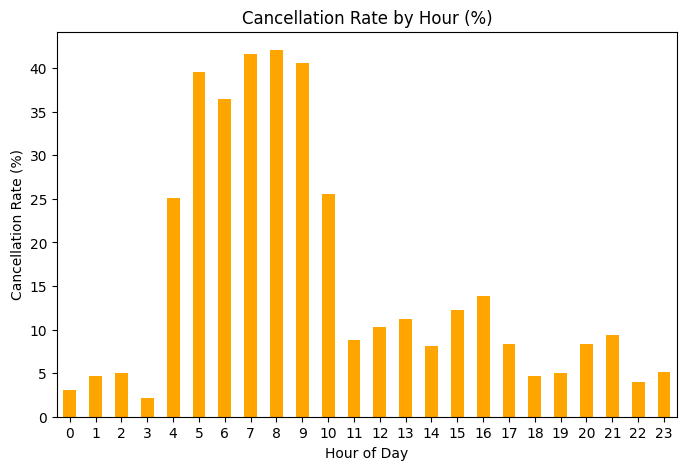

In [24]:
total_by_hour = data.groupby('Request hour').size()
cancelled_by_hour = data[data['Status'] == 'Cancelled'].groupby('Request hour').size()

cancel_rate = (cancelled_by_hour / total_by_hour) * 100
cancel_rate = cancel_rate.fillna(0)

plt.figure(figsize=(8, 5))
cancel_rate.plot(kind='bar', color='orange')
plt.title("Cancellation Rate by Hour (%)")
plt.xlabel("Hour of Day")
plt.ylabel("Cancellation Rate (%)")
plt.xticks(rotation=0)
plt.show()

### Why this chart?
To understand when cancellations are most likely to occur.

### Insights:
Cancellation rate is highest during 7–10 AM — the morning peak.

### Business Impact:
Driver behavior may be a factor here. Incentivizing drivers during these hours could reduce cancellations and improve reliability.

# **Solution to Business Objective**

1. Increase fleet availability during peak hours in the city and near the airport.
2. Use historical request patterns to forecast demand and schedule drivers accordingly.
3. Improve driver incentives during high-cancellation windows.
4. Incorporate real-time status heatmaps in driver/ops dashboards to reduce no-car scenarios.


# **Conclusion**
By carefully analyzing the data and using visualizations, we found patterns in time and location that show where Uber is facing problems. These problems include too many cancellations and not enough cars during busy hours. To fix this, Uber should better plan when and where drivers are needed. This will help improve service and keep customers happy.